In [67]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['figure.figsize'] = (30, 60)
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['axes.grid'] = False

In [56]:
# Set random seed to ensure reproducibility
tf.random.set_seed(1)

In [57]:
# Load dataset
data = pd.read_excel('Data_example.xlsx')

In [58]:
# Check dataset
data.head()

,Date,weather station,weather station.1,weather station.2,weather station.3,weather station.4,weather station.5,weather station.6,pyranometer,pyranometer.1,pyranometer.2,inverter,forecast,forecast.1,forecast.2,forecast.3,forecast.4,forecast.5
0,NaT,Wind Direction (Mean) [°],Wind Speed [m/s] (Mean) [m/s],Total rain (Mean) [mm],Current Rain (Mean) [mm],Humidity (Mean) [%],Temperature (Mean) [°C],Atmospheric Pressure (Mean) [hPa],Temperature: Ambient (Mean) [°C],Temperature: Module (Mean) [°C],Radiation Power (Tilted) (Mean) [W/m²],AC Power (norm) (Mean) [kW/kWp],Atmospheric Pressure (Mean) [hPa],Humidity (Mean) [%],Irradiance: Tilted (Mean) [W/m²],Temperature: Ambient (Mean) [°C],Wind Direction (Mean) [°],Wind Speed (Mean) [m/s]
1,2018-12-01 00:15:00,161.75,1.66,1793.21,0,76.6,0.4,1008.29,0.29,0.1,0,0,1015.12,87,0,0.52,164,4.28
2,2018-12-01 00:30:00,158.78,1.75,1793.22,0,78.64,0.3,1008.21,0.23,0.09,0,0,1015.01,89,0,0.48,162,4.18
3,2018-12-01 00:45:00,150.88,1.69,1793.27,0.01,80.9,0.15,1008.11,0.17,0.08,0,0,1014.87,90,0,0.43,160,4.04
4,2018-12-01 01:00:00,144.48,1.99,1793.34,0,82.54,0.07,1007.94,0.08,0.06,0,0,1014.7,91,0,0.4,160,3.89


In [59]:
# First row contains source of data
data_sources = list(map(lambda x: x.split('.')[0], list(data.columns)))

# Reload dataset with correct settings
data = pd.read_excel('Data_example.xlsx', index_col=0, parse_dates=True, skiprows=1)

In [60]:
# Check data again
data.index.name = 'Date'
# Add data source to var names
c = []
for idx, col in enumerate(data.columns):
    c.append(col.split('.')[0] + ' (' + data_sources[idx + 1] + ')')
    
data.columns = c
data.head()

,Wind Direction (Mean) [°] (weather station),Wind Speed [m/s] (Mean) [m/s] (weather station),Total rain (Mean) [mm] (weather station),Current Rain (Mean) [mm] (weather station),Humidity (Mean) [%] (weather station),Temperature (Mean) [°C] (weather station),Atmospheric Pressure (Mean) [hPa] (weather station),Temperature: Ambient (Mean) [°C] (pyranometer),Temperature: Module (Mean) [°C] (pyranometer),Radiation Power (Tilted) (Mean) [W/m²] (pyranometer),AC Power (norm) (Mean) [kW/kWp] (inverter),Atmospheric Pressure (Mean) [hPa] (forecast),Humidity (Mean) [%] (forecast),Irradiance: Tilted (Mean) [W/m²] (forecast),Temperature: Ambient (Mean) [°C] (forecast),Wind Direction (Mean) [°] (forecast),Wind Speed (Mean) [m/s] (forecast)
Date,,,,,,,,,,,,,,,,,
2018-12-01 00:15:00,161.75,1.66,1793.21,0.00,76.60,0.40,1008.29,0.29,0.10,0.0,0.0,1015.12,87,0.0,0.52,164,4.28
2018-12-01 00:30:00,158.78,1.75,1793.22,0.00,78.64,0.30,1008.21,0.23,0.09,0.0,0.0,1015.01,89,0.0,0.48,162,4.18
2018-12-01 00:45:00,150.88,1.69,1793.27,0.01,80.90,0.15,1008.11,0.17,0.08,0.0,0.0,1014.87,90,0.0,0.43,160,4.04
2018-12-01 01:00:00,144.48,1.99,1793.34,0.00,82.54,0.07,1007.94,0.08,0.06,0.0,0.0,1014.70,91,0.0,0.40,160,3.89
2018-12-01 01:15:00,141.98,2.15,1793.35,0.00,84.15,0.00,1007.78,0.03,0.05,0.0,0.0,1014.51,92,0.0,0.37,163,3.74


In [61]:
data.shape

(2975, 17)

In [62]:
# Check for nas
data.isnull().sum(axis = 0)

Wind Direction (Mean) [°] (weather station)             26
Wind Speed [m/s] (Mean) [m/s]  (weather station)        26
Total rain (Mean) [mm] (weather station)                26
Current Rain (Mean) [mm] (weather station)              26
 Humidity (Mean) [%] (weather station)                  26
Temperature (Mean) [°C] (weather station)               26
Atmospheric Pressure (Mean) [hPa] (weather station)     26
Temperature: Ambient (Mean) [°C] (pyranometer)          26
Temperature: Module (Mean) [°C] (pyranometer)           26
Radiation Power (Tilted) (Mean) [W/m²] (pyranometer)    26
AC Power (norm) (Mean) [kW/kWp] (inverter)              26
Atmospheric Pressure (Mean) [hPa] (forecast)             0
Humidity (Mean) [%] (forecast)                           0
Irradiance: Tilted (Mean) [W/m²] (forecast)              0
Temperature: Ambient (Mean) [°C] (forecast)              0
Wind Direction (Mean) [°] (forecast)                     0
Wind Speed (Mean) [m/s] (forecast)                      

In [63]:
# some missing data for the 17th, won't be considered for training the model
data[data.iloc[:,0].isnull()].index

DatetimeIndex(['2018-12-17 07:45:00', '2018-12-17 08:00:00',
               '2018-12-17 08:15:00', '2018-12-17 08:30:00',
               '2018-12-17 08:45:00', '2018-12-17 09:00:00',
               '2018-12-17 09:15:00', '2018-12-17 09:30:00',
               '2018-12-17 09:45:00', '2018-12-17 10:00:00',
               '2018-12-17 10:15:00', '2018-12-17 10:30:00',
               '2018-12-17 10:45:00', '2018-12-17 11:00:00',
               '2018-12-17 11:15:00', '2018-12-17 11:30:00',
               '2018-12-17 11:45:00', '2018-12-17 12:00:00',
               '2018-12-17 12:15:00', '2018-12-17 12:30:00',
               '2018-12-17 12:45:00', '2018-12-17 13:00:00',
               '2018-12-17 13:15:00', '2018-12-17 13:30:00',
               '2018-12-17 13:45:00', '2018-12-17 14:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [64]:
# Replace with ffill
data.fillna(method='ffill', inplace=True)

In [88]:
# Quick plot of the data
data.loc['2018-12-01':'2018-12-07',:].plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a7d5c3160>,
      dtype=object)

In [69]:
TRAIN_SPLIT = 16 * 24  * 4 # Use 1st till 16th December as training

dataset = data.values

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [31]:
data.columns
# We want to predict the AC Power of the inverter, 11th variable

Index(['Wind Direction (Mean) [°] (weather station)',
       'Wind Speed [m/s] (Mean) [m/s]  (weather station)',
       'Total rain (Mean) [mm] (weather station)',
       'Current Rain (Mean) [mm] (weather station)',
       ' Humidity (Mean) [%] (weather station)',
       'Temperature (Mean) [°C] (weather station)',
       'Atmospheric Pressure (Mean) [hPa] (weather station)',
       'Temperature: Ambient (Mean) [°C] (pyranometer)',
       'Temperature: Module (Mean) [°C] (pyranometer)',
       'Radiation Power (Tilted) (Mean) [W/m²] (pyranometer)',
       'AC Power (norm) (Mean) [kW/kWp] (inverter)',
       'Atmospheric Pressure (Mean) [hPa] (forecast)',
       'Humidity (Mean) [%] (forecast)',
       'Irradiance: Tilted (Mean) [W/m²] (forecast)',
       'Temperature: Ambient (Mean) [°C] (forecast)',
       'Wind Direction (Mean) [°] (forecast)',
       'Wind Speed (Mean) [m/s] (forecast)'],
      dtype='object')

In [32]:
past_history = 3 * 24 * 4 # 3 days
future_target = 4 * 24 * 4 # 4 days
STEP = 1

# Target is the 10th variable
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 10], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)

x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 10],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [91]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [92]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target AC Power to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (288, 17)

 Target AC Power to predict : (384,)


In [93]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, -4]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

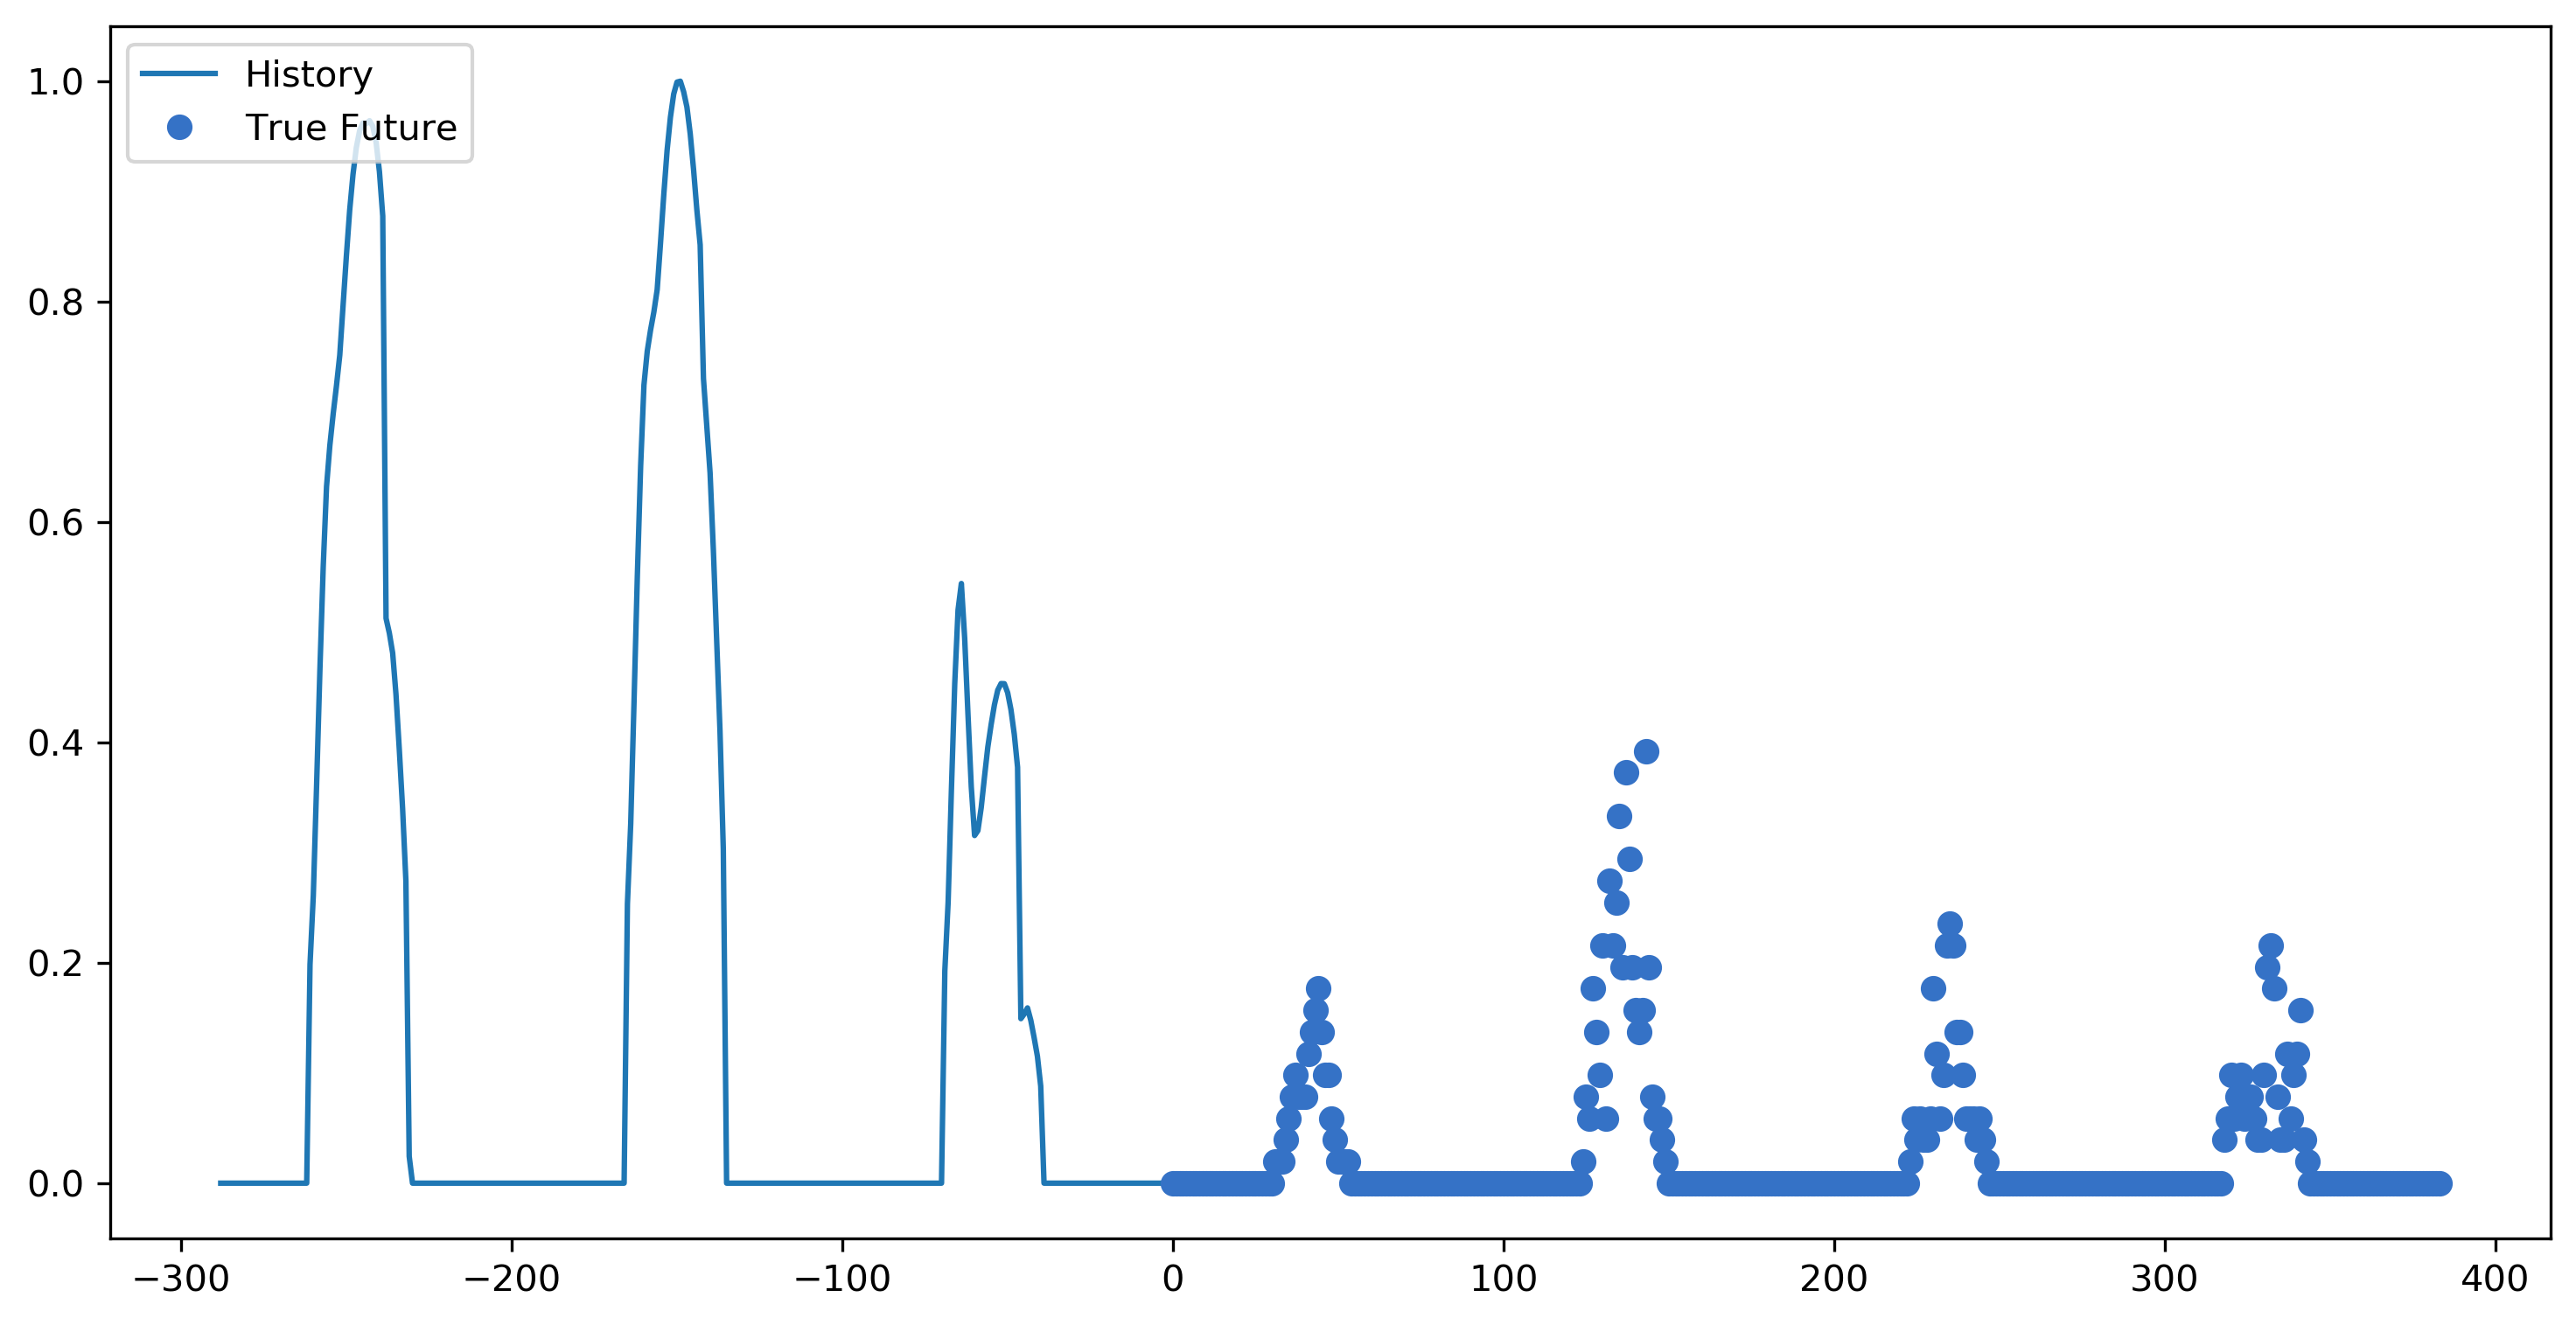

In [94]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [99]:
# Train model
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(384))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

EVALUATION_INTERVAL = 200
EPOCHS = 2

multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/2
  6/200 [..............................] - ETA: 18:50 - loss: 0.0358

KeyboardInterrupt: 

In [ ]:
# Make predictions
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x))